#**Modelo de Procesamiento Distribuido**
#####Gestión de Datos, Maestría en Ciencia de Datos
#####Pontificia Universidad Javeriana Cali

Carlos Rodrigo Piñeros, Juan Restrepo Rosero y Joel Doria Atencia

###**¿Qué es el Procesamiento Distribuido?**
El procesamiento distribuido es una técnica que divide grandes conjuntos de datos en partes más pequeñas y las procesa en múltiples computadoras o nodos de un clúster. Esto permite analizar datos masivos de manera más rápida y eficiente que en un solo equipo.

**Hadoop y Spark**: Los Gigantes del Procesamiento Distribuido
Hadoop y Spark son dos de las plataformas más populares para el procesamiento distribuido de grandes volúmenes de datos (Big Data). Aunque comparten el objetivo de procesar datos a gran escala, tienen características y enfoques diferentes.

**Hadoop**
- Almacenamiento a largo plazo de grandes volúmenes de datos.
- Procesamiento por lotes de datos históricos.
- Análisis de datos sin requisitos de tiempo real.

**Spark**
- Procesamiento en tiempo real de flujos de datos.
- Machine learning a gran escala.
- Análisis interactivo y exploratorio de datos.
- Procesamiento de gráficos.


#Caso Conteo de Palabras
Imaginen que un profesional está realizando una investigación sobre determinado tema de su interés y quiere saber cuántas veces aparecen determinadas palabras en una publicación de caracter científico que piensa utilizar a modo de referencia bibliográfica en su propio trabajo investigativo. Teniendo en cuenta que el artículo puede llegar
a tener entre 15 y 20 páginas, sería complicado para el
investigador contar por sí mismo las palabras, por lo que desea usar una herramienta que le permita procesar el texto y realizar el conteo en un menor tiempo.

Hadoop o Spark, utiliza un
Modelo de Procesamiento Distribuido distinto y goza de ciertas características,
por lo que deben analizar cómo realizar el conteo de palabras y seleccionar la
herramienta que mejor se ajuste al caso propuesto. Adicionalmente,
considerar lo siguiente:
1. Buscar un artículo científico de su interés de entre 10 a 20 páginas. El
texto de este artículo es el que usarán junto a Hadoop o Spark para
realizar el conteo de palabras.
2. El conteo de palabras se debe realizar sobre la totalidad del texto que
compone el artículo.
3. El artículo debe estar en idioma español pues la idea es hacer
comparaciones para dicho idioma.
4. El resultado del conteo de palabras debe tener una estructura similar a la que se presenta a continuación:
sigamos, 1
aprendiendo, 7
sobre, 4
la, 20
gestión, 5
de, 15
datos, 5


#**Desarrollo**

PySpark es una combinación poderosa de Python y Apache Spark, que te permite realizar análisis de datos a gran escala de manera eficiente. Es una herramienta esencial para trabajar con grandes volúmenes de datos distribuidos en clústeres.

Combina la facilidad de uso de Python con la potencia de Spark para procesar datos distribuidos.

PyPDF2 es una biblioteca de Python que te permite interactuar con archivos PDF de manera programática. Esto significa que puedes leer, modificar y crear archivos PDF directamente desde tu código Python.

+-----------+-----+
|word       |count|
+-----------+-----+
|de         |641  |
|la         |314  |
|y          |305  |
|que        |249  |
|en         |228  |
|el         |169  |
|los        |169  |
|a          |142  |
|las        |133  |
|se         |132  |
|datos      |117  |
|una        |85   |
|-          |70   |
|es         |66   |
|estudios   |62   |
|por        |61   |
|como       |61   |
|of         |57   |
|del        |56   |
|•          |54   |
|para       |52   |
|con        |51   |
|the        |50   |
|un         |50   |
|data       |49   |
|lo         |48   |
|ciencia    |47   |
|información|47   |
|and        |45   |
|big        |45   |
|no         |42   |
|análisis   |40   |
|este       |38   |
|al         |35   |
|más        |35   |
|global     |33   |
|sobre      |31   |
|globales   |30   |
|.          |29   |
|e          |29   |
|son        |27   |
|o          |26   |
|entre      |25   |
|ha         |25   |
|desde      |25   |
|sin        |23   |
|,          |23   |


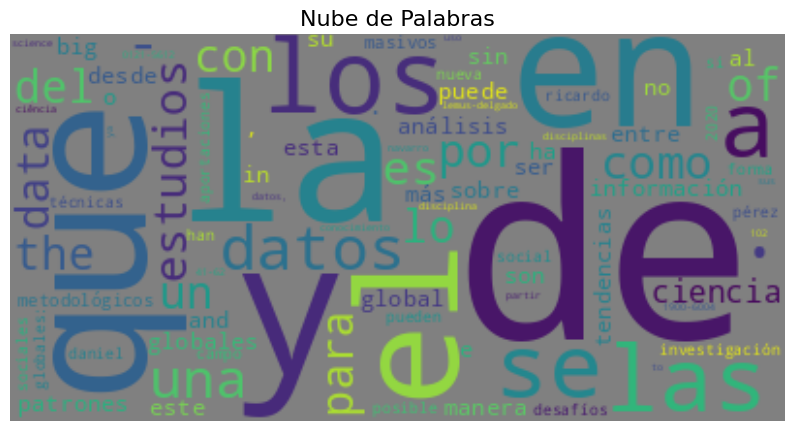

In [ ]:

#!pip install pyspark
#!pip install PyPDF2

from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, lower, col
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#path = '/content/drive/MyDrive/Master Data Science 2024/Gestion De Datos/Actividad 6/colombiaint-3824.pdf'

# Inicializar SparkSession
spark = SparkSession.builder.appName("CountWordsPDF").getOrCreate()

# Función para extraer texto de un archivo PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            for page in pdf_reader.pages:
                text += page.extract_text()
    except FileNotFoundError:
        print(f"Error: File not found at {pdf_path}")
        return ""  # Return empty string if file not found
    except Exception as e:
        print(f"Error processing PDF: {e}")
        return ""  # Return empty string for other errors
    return text

# Ruta al archivo PDF
#PDF_Path = '/content/drive/MyDrive/Master Data Science 2024/Gestion De Datos/Actividad 6/colombiaint-3824.pdf'
pdf_file_path = "colombiaint-3824.pdf" # Reemplaza con la ruta a tu archivo

# Extraer texto del PDF
pdf_text = extract_text_from_pdf(pdf_file_path)

# Crear un DataFrame con el texto
if pdf_text:
    data = [(pdf_text,)]
    df = spark.createDataFrame(data, ["text"])

    # Dividir el texto en palabras
    words_df = df.select(explode(split(lower(col("text")), "\s+")).alias("word"))

    # Contar las palabras
    word_counts = words_df.groupBy("word").count().orderBy(col("count").desc())

    # Mostrar los resultados
    word_counts.show(50, truncate=False)


    # Convertir a un diccionario para la nube de palabras
    word_freq = {row.word: row['count'] for row in word_counts.collect()}

    # Generar la nube de palabras
    wordcloud = WordCloud(background_color="gray", colormap='viridis').generate_from_frequencies(word_freq)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de Palabras", fontsize=16)
    plt.show()
else:
    print("No se pudo extraer texto del archivo PDF. Verifica la ruta del archivo y los permisos.")

# Detener la SparkSession
spark.stop()

## **Observaciones Iniciales**

A partir de los resultados obtenidos, se identifican los siguientes puntos clave:

1. Presencia de Determinantes y Conectores
Las palabras más frecuentes en el análisis incluyen "de", "la", "que", "en", "el", "los", "las", "se" y "un". Esto refleja un patrón típico del idioma español, donde los determinantes, preposiciones y conectores desempeñan un papel fundamental en la construcción de oraciones. Estas palabras son funcionales y, aunque no aportan significado específico, son esenciales para la estructura gramatical.

2. Temática del Texto Analizado
La presencia de términos como "datos", "información", "análisis", "ciencia", "global" sugiere que el texto está relacionado con temas de ciencia de datos, análisis de información o investigación académica. Esto resalta el carácter técnico o especializado del documento analizado, enfocado en áreas relevantes como la tecnología o la academia.

3. Inclusión de Palabras en Inglés
La aparición de términos en inglés, como "of", "data", "big", y "and", indica que el texto tiene un enfoque técnico o académico que combina terminología en ambos idiomas. Esto es común en documentos relacionados con ciencias de datos o tecnología, dado el predominio del inglés en estas disciplinas.

4. Frecuencia de Verbos
Aunque en el español general los verbos como "es", "ser" o "tener" suelen ser frecuentes, en este caso su presencia es limitada. Esto podría deberse a la naturaleza temática del texto, que posiblemente prioriza términos técnicos o conceptuales sobre la narrativa general.


## **¿Concuerda el resultado dado por la herramienta con las palabras más utilizadas en el idioma español?**

No necesariamente concuerda con las listas más comunes de palabras en español.

Aunque varias palabras frecuentes como "de", "la", "que", "el", "los" y "las" coinciden con las listas de uso general del idioma español, el análisis muestra una fuerte influencia de términos técnicos específicos de la temática tratada. Palabras como "datos", "información" y "análisis" destacan, lo que indica que el texto está dirigido a un público interesado en ciencia de datos o tecnología, en lugar de ser un documento de uso cotidiano o generalista.

#**Conclusión**

El análisis revela que el texto está fuertemente orientado hacia la ciencia de datos o la tecnología, con una mezcla de terminología técnica en español e inglés. Esto destaca cómo herramientas como Hadoop y Spark son fundamentales para procesar y analizar grandes volúmenes de datos. La elección de estas tecnologías debe basarse en las necesidades específicas del proyecto, considerando factores como escalabilidad, velocidad y complejidad del procesamiento requerido. Este ejercicio subraya la utilidad de estas herramientas para extraer patrones significativos y profundizar en el análisis de datos textuales.

